In [125]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()

In [3]:
X = wine.data  # Features (input data)
y = wine.target # targets (output data)

In [4]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [5]:
df.head

<bound method NDFrame.head of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonf

In [6]:
scaler = StandardScaler()

In [7]:
X_scaled = scaler.fit_transform(X)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

In [116]:
mlp = MLPClassifier(
    hidden_layer_sizes=(3,),  # Two hidden layers
    max_iter=1000,
    random_state=42,
)

In [117]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000, random_state=42)

In [118]:
y_pred = mlp.predict(X_test)

In [126]:
accuracy = accuracy_score(y_pred, y_test)
print(f'accuracy score: {accuracy*100}%')
precision = precision_score(y_pred, y_test, average = None)
print(f'precision score: {precision}')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy score: 100.0%
precision score: [1. 1. 1.]
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


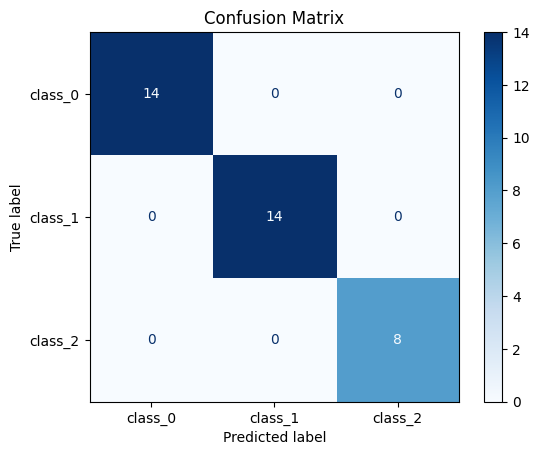

In [127]:
# Define the class labels
class_labels = wine.target_names

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()
